In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [8]:
# set seed
np.random.seed(3)

#import data set
df = pd.read_csv('Data1\\Data1\\section 7\\\AirPassengers.csv', sep=',', parse_dates=True, index_col=0)
data = df.values

### convert to float32

In [9]:
# using keras often required the data type float32
data = data.astype('float32')

In [10]:
# slice the data
train = data[0:125, :] # length 125
test = data[125: , :] #length 9

In [11]:
def prepare_data(data, lags=1):
    X, y = [], []
    for row in range(len(data) - lags -1):
        a = data[row:(row + lags), 0]
        X.append(a)
        y.append(data[row + lags, 0])
    return np.array(X), np.array(y)

In [12]:
# prepare the data

lags = 1
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)
y_true= y_test # due to naming convention

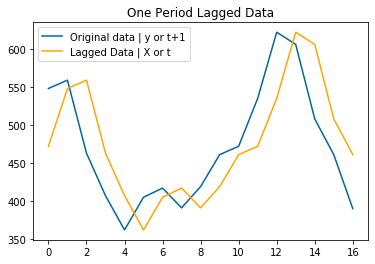

In [14]:
# plot the created data
plt.plot(y_test, label='Original data | y or t+1', color='#006699')
plt.plot(X_test, label='Lagged Data | X or t', color='orange')
plt.legend(loc='upper left')
plt.title('One Period Lagged Data')
plt.show()

## Multi-layer Perceptron (MLP)

In [24]:
mdl = Sequential()
mdl.add(Dense(3, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 0s - loss: 69489.9810
Epoch 2/200
 - 0s - loss: 66450.9566
Epoch 3/200
 - 0s - loss: 61891.9987
Epoch 4/200
 - 0s - loss: 55999.1575
Epoch 5/200
 - 0s - loss: 49029.0562
Epoch 6/200
 - 0s - loss: 41368.0339
Epoch 7/200
 - 0s - loss: 33553.7486
Epoch 8/200
 - 0s - loss: 26011.6226
Epoch 9/200
 - 0s - loss: 19148.4736
Epoch 10/200
 - 0s - loss: 13460.8986
Epoch 11/200
 - 0s - loss: 9023.8478
Epoch 12/200
 - 0s - loss: 5806.0149
Epoch 13/200
 - 0s - loss: 3666.9822
Epoch 14/200
 - 0s - loss: 2330.8056
Epoch 15/200
 - 0s - loss: 1578.8301
Epoch 16/200
 - 0s - loss: 1169.3737
Epoch 17/200
 - 0s - loss: 976.9734
Epoch 18/200
 - 0s - loss: 893.3923
Epoch 19/200
 - 0s - loss: 858.4886
Epoch 20/200
 - 0s - loss: 844.0421
Epoch 21/200
 - 0s - loss: 841.7685
Epoch 22/200
 - 0s - loss: 838.3601
Epoch 23/200
 - 0s - loss: 837.0553
Epoch 24/200
 - 0s - loss: 836.7535
Epoch 25/200
 - 0s - loss: 836.0995
Epoch 26/200
 - 0s - loss: 844.0270
Epoch 27/200
 - 0s - loss: 846.5391
Epoch 28/20

In [17]:
import math

In [25]:
#estimate model performance
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))


Train Score: 831.21 MSE (28.83 RMSE)
Test Score: 3199.70 MSE (56.57 RMSE)


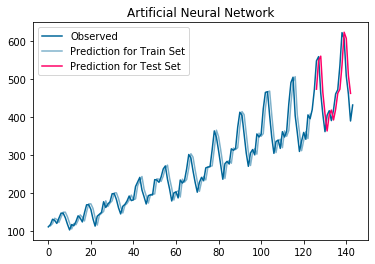

In [26]:
# generate predictions for training
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)
 
# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict
 
# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags*2)+1:len(data)-1, :] = test_predict
 
# plot baseline and predictions
plt.plot(data, label='Observed', color='#006699');
plt.plot(train_predict_plot, label='Prediction for Train Set', color='#006699', alpha=0.5);
plt.plot(test_predict_plot, label='Prediction for Test Set', color='#ff0066');
plt.legend(loc='best');
plt.title('Artificial Neural Network')
plt.show()